## Model frequency

We estimate model frequencies using the following package:
https://github.com/cpilab/group-bayesian-model-comparison


In [1]:
from groupBMC.groupBMC import GroupBMC
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
models_inf = ["Euclidean", "Temporal", "Compositional", "Mean-tracker"]
models_noninf = ["Euclidean", "Temporal", "Compositional", "Mean-tracker"]

# Choice task

In [3]:
losses = pd.read_csv("loocv_choice.csv")
ids = np.array(losses["id"])
models = list(losses.columns.values)
print(models)
print(losses.shape)


losses = losses.values

L = np.zeros((4, len(np.unique(ids))))
print(L.shape, losses.shape)

['euc', 'temp', 'comp', 'mt', 'id']
(4800, 5)
(4, 48) (4800, 5)


In [4]:
for i, ID in enumerate(np.unique(ids)):
    idx = np.where(losses[:, -1] == ID)
    l1 = losses[idx, 0]
    l2 = losses[idx, 1]
    l3 = losses[idx, 2]
    l4 = losses[idx, 3]
    
    L[0, i] = np.sum(l1)
    L[1, i] = np.sum(l2)
    L[2, i] = np.sum(l3)
    L[3, i] = np.sum(l4)

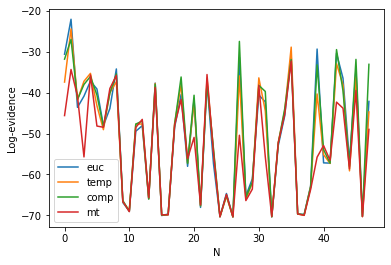

In [5]:
_, ax = plt.subplots()
for i in range(len(L)):
    ax.plot(L[i], label=models[i])
ax.set_xlabel('N')
ax.set_ylabel('Log-evidence')
ax.legend()
plt.show()

In [6]:
result = GroupBMC(L).get_result()


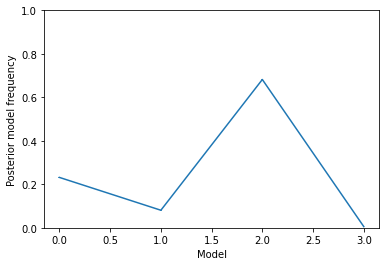

In [7]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(L)), result.frequency_mean, result.frequency_var)
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

In [8]:
print(result.frequency_mean)
print(result.frequency_var)
print(result.protected_exceedance_probability)
print(result.exceedance_probability)

final_results = pd.DataFrame()
final_results["mean"] = result.frequency_mean
final_results["var"] = result.frequency_var
final_results["pxp"] = result.protected_exceedance_probability
final_results["xp"] = result.exceedance_probability
final_results.to_csv("model_freq_choice.csv", index=False)
#final_results.to_csv("val_models_freq.csv", index=False)

[0.23172894 0.08075801 0.6819969  0.00551616]
[0.00356061 0.00148472 0.00433754 0.00010971]
[0.21362537 0.21357731 0.35922001 0.2135773 ]
[3.29924991e-04 7.80039071e-08 9.99669997e-01 2.23569709e-12]


In [9]:
individual = pd.DataFrame(result.attribution.T, columns=models_noninf)
individual.to_csv("individual_pxp_choice.csv", index=False)


# Value inference task

# Inference objects

In [10]:
losses = pd.read_csv("loocv_value_models_inf.csv")
ids = np.array(losses["id"])
models = list(losses.columns.values)
print(models)


losses = losses.values

L = np.zeros((4, len(np.unique(ids))))
print(L.shape, losses.shape)

['euc', 'temp', 'comp', 'mt', 'id']
(4, 48) (192, 5)


In [11]:
for i, ID in enumerate(np.unique(ids)):
    idx = np.where(losses[:, -1] == ID)
    l1 = losses[idx, 0]
    l2 = losses[idx, 1]
    l3 = losses[idx, 2]
    l4 = losses[idx, 3]
    L[0, i] = np.sum(l1)
    L[1, i] = np.sum(l2)
    L[2, i] = np.sum(l3)
    L[3, i] = np.sum(l4)
    

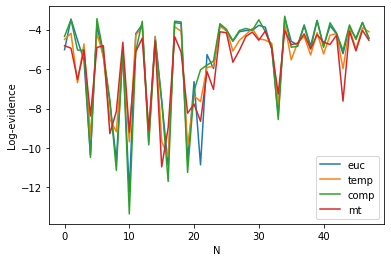

In [12]:
_, ax = plt.subplots()
for i in range(len(L)):
    ax.plot(L[i], label=models[i])
ax.set_xlabel('N')
ax.set_ylabel('Log-evidence')
ax.legend()
plt.show()

In [13]:
result = GroupBMC(L).get_result()


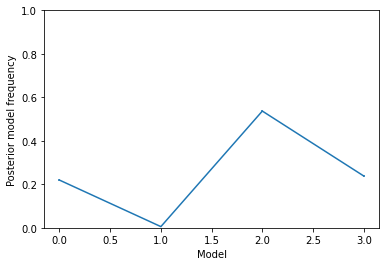

In [14]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(L)), result.frequency_mean, result.frequency_var)
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

In [15]:
print(result.frequency_mean)
print(result.frequency_var)
print(result.protected_exceedance_probability)
print(result.exceedance_probability)

final_results = pd.DataFrame()
final_results["mean"] = result.frequency_mean
final_results["var"] = result.frequency_var
final_results["pxp"] = result.protected_exceedance_probability
final_results["xp"] = result.exceedance_probability
final_results.to_csv("val_models_freq_inf.csv", index=False)


[0.21954411 0.00544579 0.53685214 0.23815796]
[0.00342689 0.00010832 0.00497284 0.00362877]
[0.24343311 0.24332363 0.26972584 0.24351743]
[4.09953140e-03 4.18066202e-10 9.88643586e-01 7.25688265e-03]


In [16]:
individual = pd.DataFrame(result.attribution.T, columns=models_inf)
individual.to_csv("individual_pxp_inf.csv", index=False)

## Non-inference objects

In [17]:
losses = pd.read_csv("loocv_value_models_noninf.csv")
ids = np.array(losses["id"])
models = list(losses.columns.values)
print(models)


losses = losses.values

L = np.zeros((4, len(np.unique(ids))))
print(L.shape, losses.shape)

['euc', 'temp', 'comp', 'mt', 'id']
(4, 48) (960, 5)


In [18]:
for i, ID in enumerate(np.unique(ids)):
    idx = np.where(losses[:, -1] == ID)
    l1 = losses[idx, 0]
    l2 = losses[idx, 1]
    l3 = losses[idx, 2]
    l4 = losses[idx, 3]
    
    L[0, i] = np.sum(l1)
    L[1, i] = np.sum(l2)
    L[2, i] = np.sum(l3)
    L[3, i] = np.sum(l4)

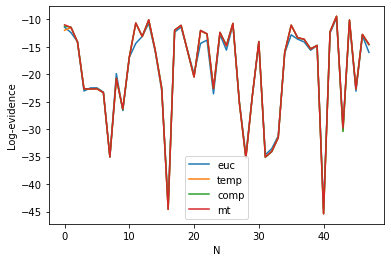

In [19]:
_, ax = plt.subplots()
for i in range(len(L)):
    ax.plot(L[i], label=models[i])
ax.set_xlabel('N')
ax.set_ylabel('Log-evidence')
ax.legend()
plt.show()

In [20]:
result = GroupBMC(L).get_result()


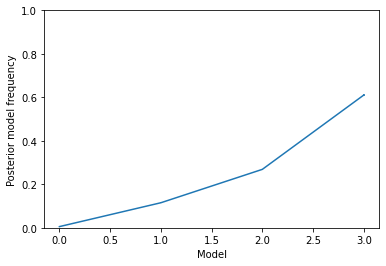

In [21]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(L)), result.frequency_mean, result.frequency_var)
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

In [22]:
print(result.frequency_mean)
print(result.frequency_var)
print(result.protected_exceedance_probability)
print(result.exceedance_probability)

final_results = pd.DataFrame()
final_results["mean"] = result.frequency_mean
final_results["var"] = result.frequency_var
final_results["pxp"] = result.protected_exceedance_probability
final_results["xp"] = result.exceedance_probability
final_results.to_csv("val_models_freq_noninf.csv", index=False)
#final_results.to_csv("val_models_freq.csv", index=False)

[0.00548744 0.11522972 0.26874656 0.61053627]
[0.00010915 0.00203904 0.00393044 0.00475563]
[0.24673385 0.24673394 0.2467926  0.25973961]
[3.10496222e-11 6.55172855e-06 4.49667477e-03 9.95496773e-01]


In [23]:
individual = pd.DataFrame(result.attribution.T, columns=models_noninf)
individual.to_csv("individual_pxp_noninf.csv", index=False)